<a href="https://colab.research.google.com/github/trinhvu1711/ML_Semester2_2023/blob/main/Lab_6_20130471_TrinhLongVu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [72]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
#Import svm model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
# GaussianNB
from sklearn.naive_bayes import GaussianNB
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


In [ ]:
data4 = datasets.load_digits()
cols = data4['feature_names']
X = data4['data']
y = data4['target']
data = pd.DataFrame(X)
# print(data)
data.columns = cols
data['target'] = y
print(data)
# X, y without Feature Selection.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

Random Forest Classifier

In [ ]:
data4

#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



Random Forest Classifier

In [ ]:
# code
#Create a Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfcac = round(accuracy_score(y_test, y_pred), 4)
rfcpc = round(precision_score(y_test, y_pred, average='micro'), 4)
rfcrc= round(recall_score(y_test, y_pred, average='micro'), 4)
rfcf= round(f1_score(y_test, y_pred, average='micro'), 4)
print ("Accuracy : ", rfcac) 
print ("Precision : ", rfcpc) 
print ("Recall score : ", rfcrc) 
print ("F1 score : ", rfcf)

GaussianNB

In [ ]:

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
gnbac = round(accuracy_score(y_test, y_pred), 4)
gnbpc = round(precision_score(y_test, y_pred, average='micro'), 4)
gnbrc= round(recall_score(y_test, y_pred, average='micro'), 4)
gnbf= round(f1_score(y_test, y_pred, average='micro'), 4)
print ("Accuracy : ", gnbac) 
print ("Precision : ", gnbpc) 
print ("Recall score : ", gnbrc) 
print ("F1 score : ", gnbf)

Accuracy :  0.813
Precision :  0.813
Recall score :  0.813
F1 score :  0.813


svm Classifier

In [ ]:
#Create a svm Classifier
svm = svm.SVC(kernel='rbf') # rbf Kernel
#Train the model using the training sets
svm.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = svm.predict(X_test)
svmac = round(accuracy_score(y_test, y_pred), 2)
svmpc = round(precision_score(y_test, y_pred, average='micro'), 2)
svmrc= round(recall_score(y_test, y_pred, average='micro'), 2)
svmf= round(f1_score(y_test, y_pred, average='micro'), 2)
print ("Accuracy : ", svmac) 
print ("Precision : ", svmpc) 
print ("Recall score : ", svmrc) 
print ("F1 score : ", svmf)

Accuracy :  0.98
Precision :  0.98
Recall score :  0.98
F1 score :  0.98


In [ ]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,y)



RandomForestClassifier()

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=data4.feature_names).sort_values(ascending=False)
feature_imp

pixel_2_5    0.049363
pixel_5_3    0.041176
pixel_3_2    0.040690
pixel_5_2    0.038999
pixel_4_4    0.037660
               ...   
pixel_7_0    0.000012
pixel_0_0    0.000000
pixel_4_7    0.000000
pixel_1_0    0.000000
pixel_4_0    0.000000
Length: 64, dtype: float64

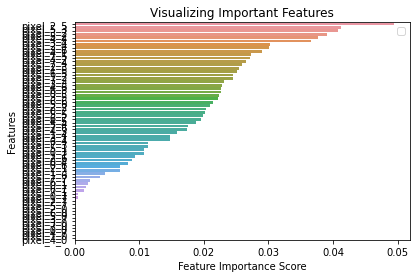

In [ ]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
features = feature_imp.index[0:2].values
print(feature_imp.index[0:2].values)
# features_index = data4.feature_names.index(feature_imp.index[0:2].values)
X_new = data[feature_imp.index[0:2]]
X_new

['pixel_2_5' 'pixel_5_3']


,pixel_2_5,pixel_5_3
0,11.0,0.0
1,6.0,16.0
2,16.0,16.0
3,0.0,0.0
4,2.0,16.0
...,...,...
1792,16.0,0.0
1793,13.0,7.0
1794,16.0,14.0
1795,16.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1)

Random Forest

In [ ]:
#Create a Random Forest Classifier
rfcsf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
rfcsf.fit(X_train,y_train)
y_pred = rfcsf.predict(X_test)
rfcsfac = round(accuracy_score(y_test, y_pred), 4)
rfcsfpc = round(precision_score(y_test, y_pred, average='micro'), 4)
rfcsfrc= round(recall_score(y_test, y_pred, average='micro'), 4)
rfcsff= round(f1_score(y_test, y_pred, average='micro'), 4)
print ("Accuracy : ", rfcsfac) 
print ("Precision : ", rfcsfpc) 
print ("Recall score : ", rfcsfrc) 
print ("F1 score : ", rfcsff)

Accuracy :  0.3556
Precision :  0.3556
Recall score :  0.3556
F1 score :  0.3556


GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
gnbsfac = round(accuracy_score(y_test, y_pred), 4)
gnbsfpc = round(precision_score(y_test, y_pred, average='micro'), 4)
gnbsfrc= round(recall_score(y_test, y_pred, average='micro'), 4)
gnbsff= round(f1_score(y_test, y_pred, average='micro'), 4)
print ("Accuracy : ", gnbsfac) 
print ("Precision : ", gnbsfpc) 
print ("Recall score : ", gnbsfrc) 
print ("F1 score : ", gnbsff)

Accuracy :  0.3889
Precision :  0.3889
Recall score :  0.3889
F1 score :  0.3889


svm

In [ ]:
#Create a svm Classifier
svmsf = svm.SVC(kernel='rbf') # rbf Kernel
#Train the model using the training sets
svmsf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = svmsf.predict(X_test)
svmsfac = round(accuracy_score(y_test, y_pred), 2)
svmsfpc = round(precision_score(y_test, y_pred, average='micro'), 2)
svmsfrc= round(recall_score(y_test, y_pred, average='micro'), 2)
svmsff= round(f1_score(y_test, y_pred, average='micro'), 2)
print ("Accuracy : ", svmsfac) 
print ("Precision : ", svmsfpc) 
print ("Recall score : ", svmsfrc) 
print ("F1 score : ", svmsff)

Accuracy :  0.41
Precision :  0.41
Recall score :  0.41
F1 score :  0.41


In [ ]:
table1 = PrettyTable()
table1.field_names = ["Classification algorithm", "Accuracy", "Precision", "Recall", "F1-score"]
table1.add_row(["Random Forest", rfcac, rfcpc, rfcrc, rfcf])
table1.add_row(["GaussianNB", gnbac, gnbpc, gnbrc, gnbf])
table1.add_row(["SVM",svmac, svmpc, svmrc, svmf ])
table1.title = 'Results without using selection feature'


In [ ]:
table2 = PrettyTable()
table2.field_names = ["Classification algorithm", "Accuracy", "Precision", "Recall", "F1-score"]
table2.add_row(["Random Forest", rfcsfac, rfcsfpc, rfcsfrc, rfcsff])
table2.add_row(["GaussianNB", gnbsfac, gnbsfpc, gnbsfrc, gnbsff])
table2.add_row(["SVM",svmsfac, svmsfpc, svmsfrc, svmsff ])
table2.title = 'Results using selection feature'
print(table1)
print(table2)

+---------------------------------------------------------------------+
|               Results without using selection feature               |
+--------------------------+----------+-----------+--------+----------+
| Classification algorithm | Accuracy | Precision | Recall | F1-score |
+--------------------------+----------+-----------+--------+----------+
|      Random Forest       |  0.9667  |   0.9667  | 0.9667 |  0.9667  |
|        GaussianNB        |  0.813   |   0.813   | 0.813  |  0.813   |
|           SVM            |   0.98   |    0.98   |  0.98  |   0.98   |
+--------------------------+----------+-----------+--------+----------+
+---------------------------------------------------------------------+
|                   Results using selection feature                   |
+--------------------------+----------+-----------+--------+----------+
| Classification algorithm | Accuracy | Precision | Recall | F1-score |
+--------------------------+----------+-----------+--------+----

#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



#3.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [41]:
data3_1 = pd.read_csv('bank.csv')
print(data3_1)


       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [42]:
#code
data3_1_name = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
# StandardScale for each columns
for i in data3_1_name:
  # print(i)
  data_feature = data3_1[i]
  data_trans = scaler.fit_transform(data_feature.values.reshape(-1,1))
  # print(data_trans)
  data3_1[i] = data_trans
print(data3_1)


            age          job  marital  education default   balance housing  \
0      1.491505       admin.  married  secondary      no  0.252525     yes   
1      1.239676       admin.  married  secondary      no -0.459974      no   
2     -0.019470   technician  married  secondary      no -0.080160     yes   
3      1.155733     services  married  secondary      no  0.293762     yes   
4      1.071790       admin.  married   tertiary      no -0.416876      no   
...         ...          ...      ...        ...     ...       ...     ...   
11157 -0.691015  blue-collar   single    primary      no -0.473616     yes   
11158 -0.187357     services  married  secondary      no -0.246658      no   
11159 -0.774958   technician   single  secondary      no -0.464934      no   
11160  0.148416   technician  married  secondary      no -0.473926      no   
11161 -0.607072   technician  married  secondary      no -0.473926      no   

      loan   contact       day month  duration  campaign     pd

#3.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [43]:
#code
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
categoricalName = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
categoricalData = data3_1[categoricalName]
for i in categoricalName:
  # print(i)
  categorical_feature = data3_1[i]
  encoded_data = encoder.fit_transform(categoricalData).toarray()
  # print(encoded_data)
  data3_1[i] = data_trans
print(data3_1)


            age       job   marital  education   default   balance   housing  \
0      1.491505 -0.363260 -0.363260  -0.363260 -0.363260  0.252525 -0.363260   
1      1.239676 -0.363260 -0.363260  -0.363260 -0.363260 -0.459974 -0.363260   
2     -0.019470 -0.363260 -0.363260  -0.363260 -0.363260 -0.080160 -0.363260   
3      1.155733 -0.363260 -0.363260  -0.363260 -0.363260  0.293762 -0.363260   
4      1.071790 -0.363260 -0.363260  -0.363260 -0.363260 -0.416876 -0.363260   
...         ...       ...       ...        ...       ...       ...       ...   
11157 -0.691015 -0.363260 -0.363260  -0.363260 -0.363260 -0.473616 -0.363260   
11158 -0.187357 -0.363260 -0.363260  -0.363260 -0.363260 -0.246658 -0.363260   
11159 -0.774958 -0.363260 -0.363260  -0.363260 -0.363260 -0.464934 -0.363260   
11160  0.148416  1.818332  1.818332   1.818332  1.818332 -0.473926  1.818332   
11161 -0.607072 -0.363260 -0.363260  -0.363260 -0.363260 -0.473926 -0.363260   

           loan   contact       day    

#3.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

In [44]:
data3_1['deposit'] = data3_1['deposit'].replace({'yes': 1, 'no': 0})

X = data3_1.iloc[:, 1:-1]
y = data3_1.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(y)
print(data3_1)

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64
            age       job   marital  education   default   balance   housing  \
0      1.491505 -0.363260 -0.363260  -0.363260 -0.363260  0.252525 -0.363260   
1      1.239676 -0.363260 -0.363260  -0.363260 -0.363260 -0.459974 -0.363260   
2     -0.019470 -0.363260 -0.363260  -0.363260 -0.363260 -0.080160 -0.363260   
3      1.155733 -0.363260 -0.363260  -0.363260 -0.363260  0.293762 -0.363260   
4      1.071790 -0.363260 -0.363260  -0.363260 -0.363260 -0.416876 -0.363260   
...         ...       ...       ...        ...       ...       ...       ...   
11157 -0.691015 -0.363260 -0.363260  -0.363260 -0.363260 -0.473616 -0.363260   
11158 -0.187357 -0.363260 -0.363260  -0.363260 -0.363260 -0.246658 -0.363260   
11159 -0.774958 -0.363260 -0.363260  -0.363260 -0.363260 -0.464934 -0.363260   
11160  0.148416  1.818332  1.818332 

Decision tree

In [45]:
#code
clf_model = DecisionTreeClassifier()
clf_model.fit(X_train,y_train)
# tree.plot_tree(clf)
y_pred_dt = clf_model.predict(X_test)
print('Decision Tree Classifier:')
dtac = round(accuracy_score(y_test, y_pred_dt), 4)
dtpc = round(precision_score(y_test, y_pred_dt), 4)
dtrc= round(recall_score(y_test, y_pred_dt), 4)
dtf= round(f1_score(y_test, y_pred_dt), 4)
print('Accuracy:', dtac)
print('Precision:', dtpc)
print('Recall:', dtrc)
print('F1-score:', dtf)
print()

Decision Tree Classifier:
Accuracy: 0.728
Precision: 0.7108
Recall: 0.7193
F1-score: 0.715



Random forest

In [46]:
# code
#Create a Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfcac = round(accuracy_score(y_test, y_pred), 4)
rfcpc = round(precision_score(y_test, y_pred), 4)
rfcrc= round(recall_score(y_test, y_pred), 4)
rfcf= round(f1_score(y_test, y_pred), 4)
print ("Accuracy : ", rfcac) 
print ("Precision : ", rfcpc) 
print ("Recall score : ", rfcrc) 
print ("F1 score : ", rfcf)

Accuracy :  0.7817
Precision :  0.7671
Recall score :  0.7753
F1 score :  0.7712


kNN

In [47]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
knnac =round(accuracy_score(y_test, y_pred_knn), 4)
knnpc =round(precision_score(y_test, y_pred_knn), 4)
knnrc=round(recall_score(y_test, y_pred_knn), 4)
knnf=round(f1_score(y_test, y_pred_knn), 4)
print('kNN Classifier:')
print('Accuracy:', knnac)
print('Precision:', knnpc)
print('Recall:', knnrc)
print('F1-score:', knnf)
print()

kNN Classifier:
Accuracy: 0.7325
Precision: 0.7305
Recall: 0.691
F1-score: 0.7102



NaïveBayes

In [48]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
gnbac = round(accuracy_score(y_test, y_pred), 4)
gnbpc = round(precision_score(y_test, y_pred, average='micro'), 4)
gnbrc= round(recall_score(y_test, y_pred, average='micro'), 4)
gnbf= round(f1_score(y_test, y_pred, average='micro'), 4)
print ("Accuracy : ", gnbac) 
print ("Precision : ", gnbpc) 
print ("Recall score : ", gnbrc) 
print ("F1 score : ", gnbf)

Accuracy :  0.6632
Precision :  0.6632
Recall score :  0.6632
F1 score :  0.6632


In [49]:
table1 = PrettyTable()
table1.field_names = ["Classification algorithm", "Accuracy", "Precision", "Recall", "F1-score"]
table1.add_row(["Decision tree", dtac, dtpc, dtrc, dtf])
table1.add_row(["Random forest", rfcac, rfcpc, rfcrc, rfcf])
table1.add_row(["kNN",knnac, knnpc, knnrc, knnf ])
table1.add_row(["NaïveBayes",gnbac, gnbpc, gnbrc, gnbf ])
table1.title = 'Results without using selection feature'
print(table1)

+---------------------------------------------------------------------+
|               Results without using selection feature               |
+--------------------------+----------+-----------+--------+----------+
| Classification algorithm | Accuracy | Precision | Recall | F1-score |
+--------------------------+----------+-----------+--------+----------+
|      Decision tree       |  0.728   |   0.7108  | 0.7193 |  0.715   |
|      Random forest       |  0.7817  |   0.7671  | 0.7753 |  0.7712  |
|           kNN            |  0.7325  |   0.7305  | 0.691  |  0.7102  |
|        NaïveBayes        |  0.6632  |   0.6632  | 0.6632 |  0.6632  |
+--------------------------+----------+-----------+--------+----------+


#3.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

Use selection feature

month        0.480239
default      0.216063
contact      0.135606
campaign     0.060725
duration     0.045985
loan         0.007624
job          0.007248
pdays        0.007204
housing      0.007096
previous     0.006376
balance      0.005843
day          0.005785
age          0.005770
education    0.004288
marital      0.004149
dtype: float64


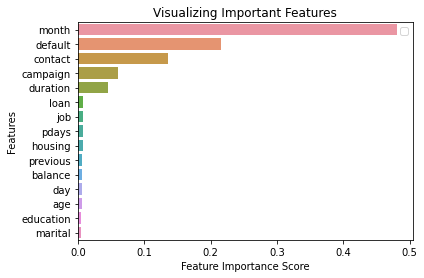

['month' 'default' 'contact' 'campaign' 'duration']


In [50]:
#code
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)
feature_names  = data3_1.columns[0:-2]
# print(feature_names)
# print(X)
# print(y)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,y)
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(feature_imp)
# draw chart
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

features = feature_imp.index[0:5].values
print(feature_imp.index[0:5].values)
# features_index = data4.feature_names.index(feature_imp.index[0:5].values)
X_new = data3_1[feature_imp.index[0:5]]
X_new
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1)

Decision tree

In [51]:
#code
clf_model = DecisionTreeClassifier()
clf_model.fit(X_train,y_train)
# tree.plot_tree(clf)
y_pred_dt = clf_model.predict(X_test)
print('Decision Tree Classifier:')
dtsfac = round(accuracy_score(y_test, y_pred_dt), 4)
dtsfpc = round(precision_score(y_test, y_pred_dt), 4)
dtsfrc= round(recall_score(y_test, y_pred_dt), 4)
dtsff= round(f1_score(y_test, y_pred_dt), 4)
print('Accuracy:', dtsfac)
print('Precision:', dtsfpc)
print('Recall:', dtsfrc)
print('F1-score:', dtsff)
print()

Decision Tree Classifier:
Accuracy: 0.7086
Precision: 0.7255
Recall: 0.6205
F1-score: 0.6689



Random forest

In [52]:
# code
#Create a Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfcsfac = round(accuracy_score(y_test, y_pred), 4)
rfcsfpc = round(precision_score(y_test, y_pred), 4)
rfcsfrc= round(recall_score(y_test, y_pred), 4)
rfcsff= round(f1_score(y_test, y_pred), 4)
print ("Accuracy : ", rfcsfac) 
print ("Precision : ", rfcsfpc) 
print ("Recall score : ", rfcsfrc) 
print ("F1 score : ", rfcsff)

Accuracy :  0.7193
Precision :  0.7215
Recall score :  0.6652
F1 score :  0.6922


kNN

In [53]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
knnsfac =round(accuracy_score(y_test, y_pred_knn), 4)
knnsfpc =round(precision_score(y_test, y_pred_knn), 4)
knnsfrc=round(recall_score(y_test, y_pred_knn), 4)
knnsff=round(f1_score(y_test, y_pred_knn), 4)
print('kNN Classifier:')
print('Accuracy:', knnsfac)
print('Precision:', knnsfpc)
print('Recall:', knnsfrc)
print('F1-score:', knnsff)
print()

kNN Classifier:
Accuracy: 0.7316
Precision: 0.7315
Recall: 0.686
F1-score: 0.708



NaïveBayes

In [54]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
gnbsfac = round(accuracy_score(y_test, y_pred), 4)
gnbsfpc = round(precision_score(y_test, y_pred, average='micro'), 4)
gnbsfrc= round(recall_score(y_test, y_pred, average='micro'), 4)
gnbsff= round(f1_score(y_test, y_pred, average='micro'), 4)
print ("Accuracy : ", gnbsfac) 
print ("Precision : ", gnbsfpc) 
print ("Recall score : ", gnbsfrc) 
print ("F1 score : ", gnbsff)

Accuracy :  0.7071
Precision :  0.7071
Recall score :  0.7071
F1 score :  0.7071


In [55]:
table2 = PrettyTable()
table2.field_names = ["Classification algorithm", "Accuracy", "Precision", "Recall", "F2-score"]
table2.add_row(["Decision tree", dtsfac, dtsfpc, dtsfrc, dtsff])
table2.add_row(["Random forest", rfcsfac, rfcsfpc, rfcsfrc, rfcsff])
table2.add_row(["kNN",knnsfac, knnsfpc, knnsfrc, knnsff ])
table2.add_row(["NaïveBayes",gnbsfac, gnbsfpc, gnbsfrc, gnbsff ])
table2.title = 'Results using selection feature'
print(table1)
print(table2)

+---------------------------------------------------------------------+
|               Results without using selection feature               |
+--------------------------+----------+-----------+--------+----------+
| Classification algorithm | Accuracy | Precision | Recall | F1-score |
+--------------------------+----------+-----------+--------+----------+
|      Decision tree       |  0.728   |   0.7108  | 0.7193 |  0.715   |
|      Random forest       |  0.7817  |   0.7671  | 0.7753 |  0.7712  |
|           kNN            |  0.7325  |   0.7305  | 0.691  |  0.7102  |
|        NaïveBayes        |  0.6632  |   0.6632  | 0.6632 |  0.6632  |
+--------------------------+----------+-----------+--------+----------+
+---------------------------------------------------------------------+
|                   Results using selection feature                   |
+--------------------------+----------+-----------+--------+----------+
| Classification algorithm | Accuracy | Precision | Recall | F2-

#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [91]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_2023'
data =pd.read_csv('creditcard.csv')
# data.head()
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
print(X)
print(y)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML_2023
               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506

V16     0.233431
V13     0.185893
V11     0.105125
V15     0.061837
V10     0.052959
V3      0.044064
V9      0.039262
V2      0.019247
V26     0.018847
V25     0.018757
V6      0.018226
V4      0.017943
V8      0.017466
Time    0.016769
V17     0.016115
V12     0.013571
V14     0.013571
V20     0.012376
V27     0.011311
V19     0.010654
V28     0.010647
V18     0.010507
V5      0.009161
V7      0.009109
V22     0.007051
V1      0.006806
V24     0.006626
V21     0.006576
V23     0.006091
dtype: float64


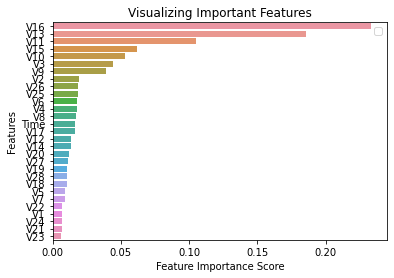

['V16' 'V13' 'V11' 'V15' 'V10' 'V3' 'V9']


,V16,V13,V11,V15,V10,V3,V9
0,-0.470401,-0.991390,-0.551600,1.468177,0.090794,2.536347,0.363787
1,0.463917,0.489095,1.612727,0.635558,-0.166974,0.166480,-0.255425
2,-2.890083,0.717293,0.624501,2.345865,0.207643,1.773209,-1.514654
3,-1.059647,0.507757,-0.226487,-0.631418,-0.054952,1.792993,-1.387024
4,-0.451449,1.345852,-0.822843,0.175121,0.753074,1.548718,0.817739
...,...,...,...,...,...,...,...
284802,1.107641,-0.689256,-1.593105,-0.924459,4.356170,-9.834783,1.914428
284803,-0.711757,1.214756,-0.150189,1.164931,-0.975926,2.035030,0.584800
284804,0.140716,-0.183699,0.411614,1.329284,-0.484782,-3.249640,0.432454
284805,-0.608577,-1.042082,-1.933849,1.962563,-0.399126,0.702510,0.392087


In [92]:
#code
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=10)
feature_names  = data.columns[0:-2]
# imputer = SimpleImputer(missing_values= np.nan, strategy ="median")
# imputer.fit(X)
# X = imputer.transform(X)
# imputer.fit([y])
# y = imputer.transform([y])
clf.fit(X,y)
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(feature_imp)
# draw chart
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

features = feature_imp.index[0:7].values
print(feature_imp.index[0:7].values)
# features_index = data4.feature_names.index(feature_imp.index[0:7].values)
X_new = data[feature_imp.index[0:7]]
X_new
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1)

Decision Tree

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1)
clf_model = DecisionTreeClassifier()
clf_model.fit(X_train,y_train)
# tree.plot_tree(clf)
y_pred_dt = clf_model.predict(X_test)
print('Decision Tree Classifier:')
dtac = round(accuracy_score(y_test, y_pred_dt), 2)
dtpc = round(precision_score(y_test, y_pred_dt), 2)
dtrc= round(recall_score(y_test, y_pred_dt), 2)
dtf= round(f1_score(y_test, y_pred_dt), 2)
print('Accuracy:', dtac)
print('Precision:', dtpc)
print('Recall:', dtrc)
print('F1-score:', dtf)
print()

Decision Tree Classifier:
Accuracy: 1.0
Precision: 0.64
Recall: 0.68
F1-score: 0.66



kNN

In [95]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
knnac =round(accuracy_score(y_test, y_pred_knn), 4)
knnpc =round(precision_score(y_test, y_pred_knn), 4)
knnrc=round(recall_score(y_test, y_pred_knn), 4)
knnf=round(f1_score(y_test, y_pred_knn), 4)
print('kNN Classifier:')
print('Accuracy:', knnac)
print('Precision:', knnpc)
print('Recall:', knnrc)
print('F1-score:', knnf)
print()

kNN Classifier:
Accuracy: 0.9994
Precision: 0.9143
Recall: 0.7111
F1-score: 0.8



Logistic Regression

In [96]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
lrac = round(accuracy_score(y_test, y_pred_lr), 4)
lrpc = round(precision_score(y_test, y_pred_lr), 4)
lrrc= round(recall_score(y_test, y_pred_lr), 4)
lrf= round(f1_score(y_test, y_pred_lr), 4)
print('Logistic Regression Classifier:')
print('Accuracy:', lrac)
print('Precision:', lrpc)
print('Recall:', lrrc)
print('F1-score:', lrf)
print()

Logistic Regression Classifier:
Accuracy: 0.999
Precision: 0.8272
Recall: 0.4963
F1-score: 0.6204



SVM

In [97]:
clf = svm.SVC(degree=3)
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
pkac = round(accuracy_score(y_test, y_pred), 4)
pkpc = round(precision_score(y_test, y_pred), 4)
pkrc= round(recall_score(y_test, y_pred), 4)
pkf= round(f1_score(y_test, y_pred), 4)
print ("Accuracy : ", pkac) 
print ("Precision : ", pkpc) 
print ("Recall score : ", pkrc) 
print ("F1 score : ", pkf)

Accuracy :  0.9994
Precision :  0.9307
Recall score :  0.6963
F1 score :  0.7966


Random Forest 

In [98]:
# code
#Create a Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfcac = round(accuracy_score(y_test, y_pred), 4)
rfcpc = round(precision_score(y_test, y_pred), 4)
rfcrc= round(recall_score(y_test, y_pred), 4)
rfcf= round(f1_score(y_test, y_pred), 4)
print ("Accuracy : ", rfcac) 
print ("Precision : ", rfcpc) 
print ("Recall score : ", rfcrc) 
print ("F1 score : ", rfcf)

Accuracy :  0.9994
Precision :  0.8962
Recall score :  0.7037
F1 score :  0.7884


NaiveBayes

In [99]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
gnbac = round(accuracy_score(y_test, y_pred), 4)
gnbpc = round(precision_score(y_test, y_pred, average='micro'), 4)
gnbrc= round(recall_score(y_test, y_pred, average='micro'), 4)
gnbf= round(f1_score(y_test, y_pred, average='micro'), 4)
print ("Accuracy : ", gnbac) 
print ("Precision : ", gnbpc) 
print ("Recall score : ", gnbrc) 
print ("F1 score : ", gnbf)

Accuracy :  0.9921
Precision :  0.9921
Recall score :  0.9921
F1 score :  0.9921


In [100]:
table_task4 = PrettyTable()
table_task4.field_names = ["Classification algorithm", "Accuracy", "Precision", "Recall", "F1-score"]
table_task4.add_row(["Decision Tree", dtac, dtpc, dtrc, dtf])
table_task4.add_row(["kNN", knnac, knnpc, knnrc, knnf])
table_task4.add_row(["Logistic regression", lrac, lrpc, lrrc, lrf])
table_task4.add_row(["SVM", pkac, pkpc, pkrc, pkf])
table_task4.add_row(["Random Forest", rfcac, rfcpc, rfcrc, rfcf])
table_task4.add_row(["NaiveBayes", gnbac, gnbpc, gnbrc, gnbf])
print(table_task4)

+--------------------------+----------+-----------+--------+----------+
| Classification algorithm | Accuracy | Precision | Recall | F1-score |
+--------------------------+----------+-----------+--------+----------+
|      Decision Tree       |   1.0    |    0.64   |  0.68  |   0.66   |
|           kNN            |  0.9994  |   0.9143  | 0.7111 |   0.8    |
|   Logistic regression    |  0.999   |   0.8272  | 0.4963 |  0.6204  |
|           SVM            |  0.9994  |   0.9307  | 0.6963 |  0.7966  |
|      Random Forest       |  0.9994  |   0.8962  | 0.7037 |  0.7884  |
|        NaiveBayes        |  0.9921  |   0.9921  | 0.9921 |  0.9921  |
+--------------------------+----------+-----------+--------+----------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.